In [151]:

import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("survey_results_public.csv")

In [4]:
import sklearn
print(sklearn.__version__)


1.26.2


In [152]:
df.head()

,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I agree,None of these,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,Never,15-30 minutes a day,15-30 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,285000.0
2,3,I agree,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...,...,6-10 times a week,6-10 times a week,3-5 times a week,30-60 minutes a day,30-60 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,250000.0
3,4,I agree,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Colleague;Friend or family member;Other online...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,1-2 times a week,15-30 minutes a day,30-60 minutes a day,Automated testing;Continuous integration (CI) ...,NaN,Appropriate in length,Easy,156000.0
4,5,I agree,I am a developer by profession,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,Hobby;Contribute to open-source projects;Profe...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Online Courses or Certi...,Formal documentation provided by the owner of ...,...,1-2 times a week,1-2 times a week,3-5 times a week,60-120 minutes a day,30-60 minutes a day,Microservices;Automated testing;Observability ...,Other,Appropriate in length,Neither easy nor difficult,23456.0


In [8]:
df=df[['Country','EdLevel','YearsCodePro','Employment','ConvertedCompYearly']]
df.rename({'ConvertedCompYearly':'Salary'},axis=1,inplace=True)

In [9]:
df = df[df["Salary"].notnull()]
df.head()

,Country,EdLevel,YearsCodePro,Employment,Salary
1,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",9,"Employed, full-time",285000.0
2,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",23,"Employed, full-time",250000.0
3,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",7,"Employed, full-time",156000.0
4,Philippines,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",4,"Employed, full-time;Independent contractor, fr...",23456.0
5,United Kingdom of Great Britain and Northern I...,Some college/university study without earning ...,21,"Employed, full-time",96828.0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9517 entries, 1 to 17093
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       9517 non-null   object 
 1   EdLevel       9517 non-null   object 
 2   YearsCodePro  9482 non-null   object 
 3   Employment    9516 non-null   object 
 4   Salary        9517 non-null   float64
dtypes: float64(1), object(4)
memory usage: 446.1+ KB


In [11]:
df = df.dropna()
df.isnull().sum()

Country         0
EdLevel         0
YearsCodePro    0
Employment      0
Salary          0
dtype: int64

In [12]:
df=df[df['Employment']=='Employed, full-time']
df=df.drop('Employment',axis=1)

In [13]:
df['Country'].value_counts()


Country
United States of America                                1500
Germany                                                  773
United Kingdom of Great Britain and Northern Ireland     527
India                                                    363
Australia                                                341
                                                        ... 
Qatar                                                      1
Bahrain                                                    1
Nomadic                                                    1
Somalia                                                    1
United Republic of Tanzania                                1
Name: count, Length: 126, dtype: int64

In [14]:
def shorten_categories(categories, cutoff):
    categorical_map = {}
    for i in range(len(categories)):
        if categories.values[i] >= cutoff:
            categorical_map[categories.index[i]] = categories.index[i]
        else:
            categorical_map[categories.index[i]] = 'Other'
    return categorical_map

In [15]:
country_map = shorten_categories(df.Country.value_counts(), 400)
df['Country'] = df['Country'].map(country_map)
df.Country.value_counts()

Country
Other                                                   4902
United States of America                                1500
Germany                                                  773
United Kingdom of Great Britain and Northern Ireland     527
Name: count, dtype: int64

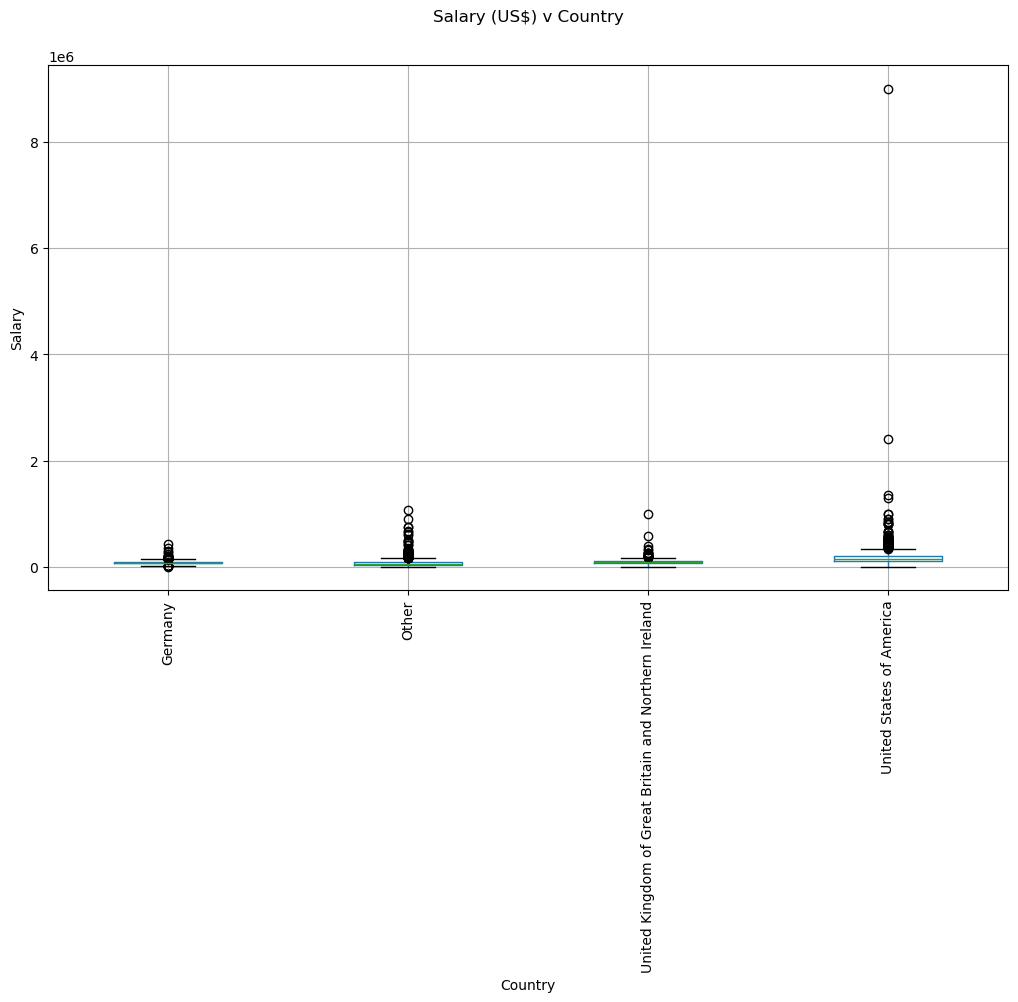

In [16]:

fig, ax = plt.subplots(1,1, figsize=(12, 7))
df.boxplot('Salary', 'Country', ax=ax)
plt.suptitle('Salary (US$) v Country')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()

In [17]:
df = df[df["Salary"] <= 250000]
df = df[df["Salary"] >= 10000]
df = df[df['Country'] != 'Other']

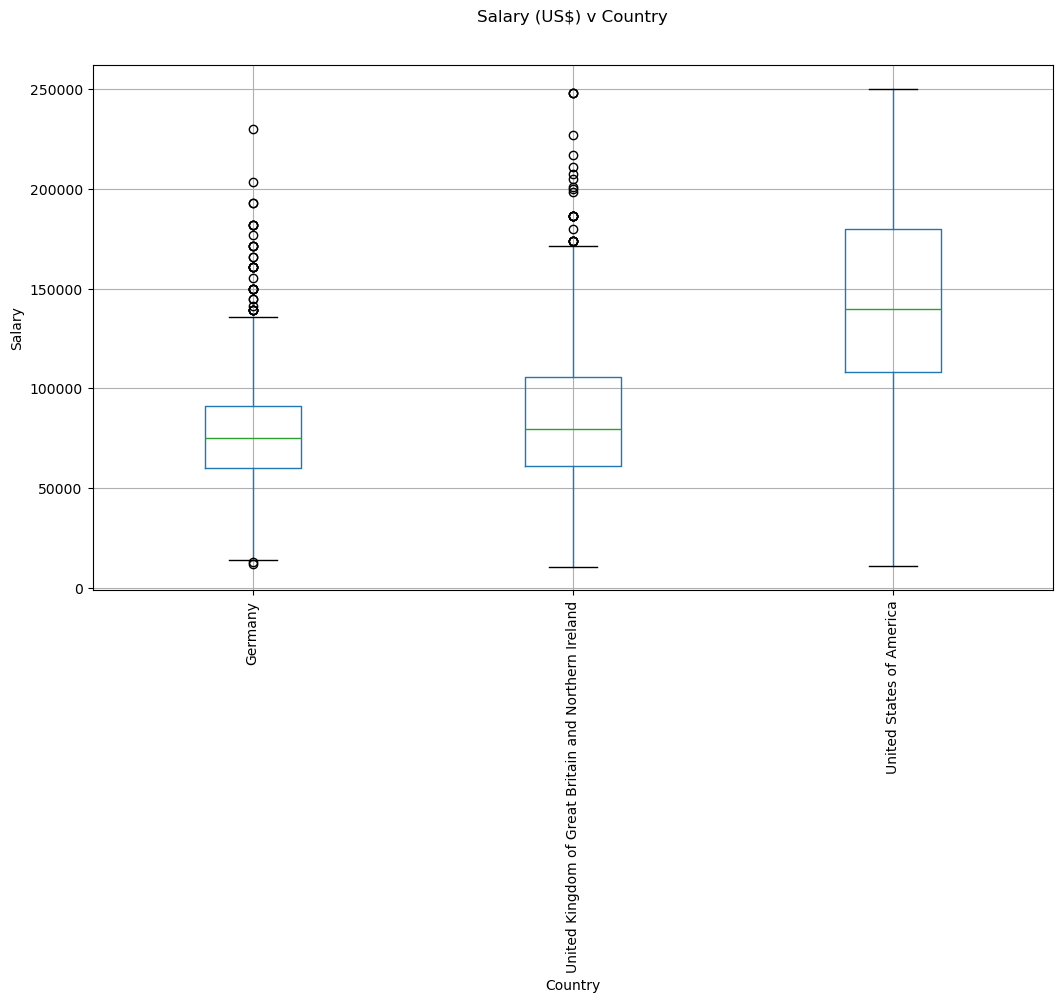

In [18]:
fig, ax = plt.subplots(1,1, figsize=(12, 7))
df.boxplot('Salary', 'Country', ax=ax)
plt.suptitle('Salary (US$) v Country')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()

In [19]:
df["YearsCodePro"].unique()

array(['23', '7', '21', '3', '9', 'Less than 1 year', '10', '14', '6',
       '5', '2', '15', '16', '24', '25', '12', '20', '19', '27', '4',
       '43', '38', '33', '29', '8', '13', '22', '1', '11', '28', '42',
       '17', '26', '31', '30', '36', '39', '34', '40', '18', '32', '44',
       '37', '35', '48', 'More than 50 years', '41', '50', '46'],
      dtype=object)

In [20]:
def clean_experience(x):
    if x ==  'More than 50 years':
        return 50
    if x == 'Less than 1 year':
        return 0.5
    return float(x)

df['YearsCodePro'] = df['YearsCodePro'].apply(clean_experience)

In [21]:
df["EdLevel"].unique()

array(['Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
       'Some college/university study without earning a degree',
       'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Professional degree (JD, MD, Ph.D, Ed.D, etc.)',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Primary/elementary school', 'Something else',
       'Associate degree (A.A., A.S., etc.)'], dtype=object)

In [22]:
def clean_education(x):
    if 'Bachelor’s degree' in x:
        return 'Bachelor’s degree'
    if 'Master’s degree' in x:
        return 'Master’s degree'
    if 'Professional degree' in x or 'Other doctoral' in x:
        return 'Post grad'
    return 'Less than a Bachelors'

df['EdLevel'] = df['EdLevel'].apply(clean_education)

In [23]:
df["EdLevel"].unique()

array(['Bachelor’s degree', 'Less than a Bachelors', 'Master’s degree',
       'Post grad'], dtype=object)

In [24]:
from sklearn.preprocessing import LabelEncoder
le_education = LabelEncoder()
df['EdLevel'] = le_education.fit_transform(df['EdLevel'])
df["EdLevel"].unique()
#le.classes_

array([0, 1, 2, 3])

In [25]:
le_country = LabelEncoder()
df['Country'] = le_country.fit_transform(df['Country'])
df["Country"].unique()

array([2, 1, 0])

In [26]:
X = df.drop("Salary", axis=1)
y = df["Salary"]

In [27]:
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
linear_reg.fit(X, y.values)

LinearRegression()

In [28]:
y_pred = linear_reg.predict(X)

In [29]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
error = np.sqrt(mean_squared_error(y, y_pred))

In [30]:
error

41440.92062673595

In [31]:
df

,Country,EdLevel,YearsCodePro,Salary
2,2,0,23.0,250000.0
3,2,0,7.0,156000.0
5,1,1,21.0,96828.0
6,2,1,3.0,135000.0
7,2,0,3.0,80000.0
...,...,...,...,...
17068,2,0,3.0,150000.0
17082,1,0,10.0,93104.0
17083,1,2,25.0,124138.0
17086,0,2,0.5,48726.0


In [32]:
from sklearn.tree import DecisionTreeRegressor
dec_tree_reg = DecisionTreeRegressor(random_state=0)
dec_tree_reg.fit(X, y.values)

DecisionTreeRegressor(random_state=0)

In [33]:
y_pred = dec_tree_reg.predict(X)

In [34]:
error = np.sqrt(mean_squared_error(y, y_pred))
print("${:,.02f}".format(error))

$35,057.70


In [35]:
from sklearn.ensemble import RandomForestRegressor
random_forest_reg = RandomForestRegressor(random_state=0)
random_forest_reg.fit(X, y.values)

RandomForestRegressor(random_state=0)

In [36]:
y_pred = random_forest_reg.predict(X)

In [37]:
error = np.sqrt(mean_squared_error(y, y_pred))
print("${:,.02f}".format(error))

$35,261.28


In [38]:

from sklearn.model_selection import GridSearchCV

max_depth = [None, 2,4,6,8,10,12]
parameters = {"max_depth": max_depth}

regressor = DecisionTreeRegressor(random_state=0)
gs = GridSearchCV(regressor, parameters, scoring='neg_mean_squared_error')
gs.fit(X, y.values)

GridSearchCV(estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'max_depth': [None, 2, 4, 6, 8, 10, 12]},
             scoring='neg_mean_squared_error')

In [39]:
regressor = gs.best_estimator_

regressor.fit(X, y.values)
y_pred = regressor.predict(X)
error = np.sqrt(mean_squared_error(y, y_pred))
print("${:,.02f}".format(error))

$38,338.47


In [40]:
X

,Country,EdLevel,YearsCodePro
2,2,0,23.0
3,2,0,7.0
5,1,1,21.0
6,2,1,3.0
7,2,0,3.0
...,...,...,...
17068,2,0,3.0
17082,1,0,10.0
17083,1,2,25.0
17086,0,2,0.5


In [41]:
# country, edlevel, yearscode
X = np.array([["United States", 'Master’s degree', 15 ]])
X

array([['United States', 'Master’s degree', '15']], dtype='<U21')

In [42]:
# from sklearn.preprocessing import LabelEncoder
# le_country = LabelEncoder(handle_unknown='ignore')
# le_education = LabelEncoder(handle_unknown='ignore')

# X[:, 0] = le_country.transform(X[:,0])
# X[:, 1] = le_education.transform(X[:,1])
# X = X.astype(float)
# X


from sklearn.preprocessing import OneHotEncoder

ohe_country = OneHotEncoder(handle_unknown='ignore')
ohe_education = OneHotEncoder(handle_unknown='ignore')

X_country_encoded = ohe_country.fit_transform(X[:, 0].reshape(-1, 1))
X_education_encoded = ohe_education.fit_transform(X[:, 1].reshape(-1, 1))

X_encoded = np.concatenate((X_country_encoded.toarray(), X_education_encoded.toarray(), X[:, 2:]), axis=1)


In [43]:
y_pred = regressor.predict(X_encoded)
y_pred

array([101638.54752852])

In [44]:
import pickle

In [45]:
data = {"model": regressor, "ohe_country": le_country, "ohe_education": le_education}
with open('saved_steps.pkl', 'wb') as file:
    pickle.dump(data, file)

In [46]:
with open('saved_steps.pkl', 'rb') as file:
    data = pickle.load(file)

regressor_loaded = data["model"]
le_country= data["ohe_country"]
le_education= data["ohe_education"]

In [47]:
# with open('saved_steps.pkl', 'rb') as file:
#     data = pickle.load(file)

# regressor_loaded = data["model"]
# le_country = data["le_country"]
# le_education = data["le_education"]

In [48]:
y_pred = regressor_loaded.predict(X_encoded)
y_pred

array([101638.54752852])

In [49]:
df.columns


Index(['Country', 'EdLevel', 'YearsCodePro', 'Salary'], dtype='object')

In [50]:

# def shorten_categories(categories, cutoff):
#     categorical_map = {}
#     for i in range(len(categories)):
#         if categories.values[i] >= cutoff:
#             categorical_map[categories.index[i]] = categories.index[i]
#         else:
#             categorical_map[categories.index[i]] = 'Other'
#     return categorical_map


# def clean_experience(x):
#     if x ==  'More than 50 years':
#         return 50
#     if x == 'Less than 1 year':
#         return 0.5
#     return float(x)


# def clean_education(x):
#     if 'Bachelor’s degree' in x:
#         return 'Bachelor’s degree'
#     if 'Master’s degree' in x:
#         return 'Master’s degree'
#     if 'Professional degree' in x or 'Other doctoral' in x:
#         return 'Post grad'
#     return 'Less than a Bachelors'


In [51]:
    # df = pd.read_csv("survey_results_public.csv")
    # df = df[["Country", "EdLevel", "YearsCodePro", "Employment", "ConvertedCompYearly"]]
    # df = df[df["ConvertedCompYearly"].notnull()]
    # df = df.dropna()
    # df = df[df["Employment"] == "Employed full-time"]
    # df = df.drop("Employment", axis=1)

In [52]:
# df

In [53]:
    # country_map = shorten_categories(df.Country.value_counts(), 400)
    # df["Country"] = df["Country"].map(country_map)
    # df = df[df["ConvertedCompYearly"] <= 250000]
    # df = df[df["ConvertedCompYearly"] >= 10000]
    # df = df[df["Country"] != "Other"]

    # df["YearsCodePro"] = df["YearsCodePro"].apply(clean_experience)
    # df["EdLevel"] = df["EdLevel"].apply(clean_education)
    # df = df.rename({"ConvertedCompYearly": "Salary"}, axis=1)

In [54]:
# import matplotlib.pyplot as plt
 
# data = df["Country"].value_counts()

# fig1, ax1 = plt.subplots()
# ax1.pie(data, labels=data.index, autopct="%1.1f%%", shadow=True, startangle=90)
# ax1.axis("equal")  # Equal aspect ratio ensures that pie is drawn as a circle.
# plt.show()


In [55]:
df = pd.read_csv("survey_results_public.csv")


In [57]:
df = pd.read_csv("survey_results_public.csv")
    # df = df[["Country", "EdLevel", "YearsCodePro", "Employment", "ConvertedCompYearly"]]
df=df[['Country','EdLevel','YearsCodePro','Employment','ConvertedCompYearly']]

country_map = shorten_categories(df.Country.value_counts(), 400)
df["Country"] = df["Country"].map(country_map)
df = df[df["ConvertedCompYearly"] <= 250000]
df = df[df["ConvertedCompYearly"] >= 10000]
df = df[df["Country"] != "Other"]

df["YearsCodePro"] = df["YearsCodePro"].apply(clean_experience)
df["EdLevel"] = df["EdLevel"].apply(clean_education)
df.rename({'ConvertedCompYearly':'Salary'},axis=1,inplace=True)
# return df

In [58]:
df.columns

Index(['Country', 'EdLevel', 'YearsCodePro', 'Employment', 'Salary'], dtype='object')

In [59]:
df

,Country,EdLevel,YearsCodePro,Employment,Salary
2,United States of America,Bachelor’s degree,23.0,"Employed, full-time",250000.0
3,United States of America,Bachelor’s degree,7.0,"Employed, full-time",156000.0
5,United Kingdom of Great Britain and Northern I...,Less than a Bachelors,21.0,"Employed, full-time",96828.0
6,United States of America,Less than a Bachelors,3.0,"Employed, full-time",135000.0
7,United States of America,Bachelor’s degree,3.0,"Employed, full-time",80000.0
...,...,...,...,...,...
89160,Mexico,Post grad,5.0,"Employed, full-time",28625.0
89162,Brazil,Master’s degree,24.0,"Employed, full-time",50719.0
89167,India,Bachelor’s degree,2.0,"Employed, full-time",15752.0
89170,France,Master’s degree,9.0,"Employed, full-time",64254.0


In [60]:
import sklearn
print(sklearn.__version__)


1.2.2
